# Aproximación de una función compleja con un perceptrón multicapa

 En este notebook veremos paso a paso cómo un perceptrón multicapa (MLP) con una capa oculta puede aproximar a una función no polinómica difícil de modelar, comparando errores en los conjuntos de entrenamiento y prueba.

## 1. Librerías y configuración inicial
Importamos las librerías necesarias y fijamos la semilla para reproducibilidad.
- numpy: manejo de vectores numéricos.
- matplotlib: generación de gráficos.
- sklearn: MLPRegressor para la red neuronal, StandardScaler para normalizar y mean_squared_error para el error.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Semilla para reproducir los mismos resultados
np.random.seed(42)

## 2. Definición de la función objetivo
Definimos la función $f(x) = x^3 + \sin(3x)$.
Esta función combina un polinomio de tercer grado con una componente trigonométrica,
lo que la hace irregular y difícil de aproximar con un polinomio simple.



In [2]:
def f(x):
    """
    Función objetivo: polinomio cúbico + componente sinusoidal
    """
    return x**3 + np.sin(3 * x)

## 3. Generación de datos
- **Conjunto de entrenamiento**: 300 puntos aleatorios en [-2,2]
- **Conjunto de prueba**: 50 puntos

Barajamos los datos, los separamos y ordenamos para facilitar la visualización.



In [3]:
# Cantidad de muestras
n_train = 300
n_test = 50

# Generamos puntos uniformes y barajamos
X_all = np.linspace(-2, 2, n_train + n_test)
np.random.shuffle(X_all)

# División en entrenamiento y prueba
X_train = np.sort(X_all[:n_train]).reshape(-1, 1)
X_test = np.sort(X_all[n_train:]).reshape(-1, 1)

y_train = f(X_train)
y_test = f(X_test)

## 4. Escalado de entradas y salidas
Escalamos características y objetivos para mejorar la convergencia del optimizador.
- StandardScaler centra y escala a desviación estándar unidad.

In [4]:
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

## 5. Configuración y entrenamiento del MLP
Utilizamos un perceptrón multicapa con:
- **Dos capas ocultas** de 50 neuronas cada una (activación tanh o relu).
- **Activación**: tanh para capturar no linealidades suaves.
- **Optimizador**: Adam con learning_rate_init = 0.01.
- **Early stopping** para evitar sobreajuste.

In [12]:
mlp = MLPRegressor(
    hidden_layer_sizes=(50, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=20000,
    early_stopping=True,
    n_iter_no_change=200,
    tol=1e-6,
    random_state=42
)

mlp.fit(X_train_scaled, y_train_scaled)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50),
             learning_rate_init=0.01, max_iter=20000, n_iter_no_change=200,
             random_state=42, tol=1e-06)

## 6. Predicciones y cálculo de error
Realizamos predicciones en ambos conjuntos y desempaquetamos los datos escalados.
Calculamos el MSE (Mean Squared Error) en entrenamiento y prueba.

In [13]:
y_train_pred_scaled = mlp.predict(X_train_scaled)
y_test_pred_scaled = mlp.predict(X_test_scaled)

y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

## 7. Visualización de resultados
Graficamos la función verdadera en un grid denso y los puntos predichos por el MLP.
- Izquierda: conjunto de entrenamiento (Train).
- Derecha: conjunto de prueba (Test).

Cada gráfico muestra también el MSE calculado.


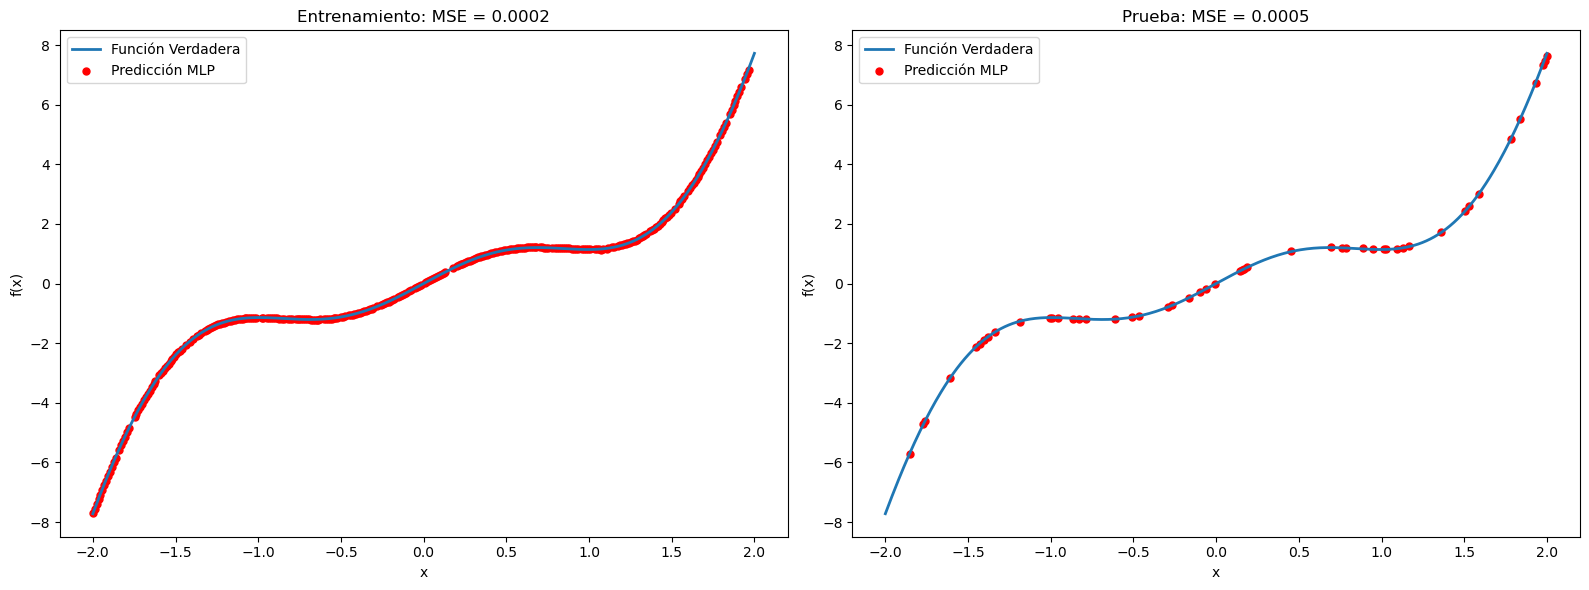

In [14]:
X_dense = np.linspace(-2, 2, 500).reshape(-1, 1)
y_dense = f(X_dense)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(X_dense, y_dense, label='Función Verdadera', linewidth=2)
axes[0].scatter(X_train, y_train_pred, label='Predicción MLP', color='red', s=25)
axes[0].set_title(f"Entrenamiento: MSE = {mse_train:.4f}")
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].legend()

axes[1].plot(X_dense, y_dense, label='Función Verdadera', linewidth=2)
axes[1].scatter(X_test, y_test_pred, label='Predicción MLP', color='red', s=25)
axes[1].set_title(f"Prueba: MSE = {mse_test:.4f}")
axes[1].set_xlabel('x')
axes[1].set_ylabel('f(x)')
axes[1].legend()

plt.tight_layout()
plt.show()

### Explicación detallada
- **Desempeño en entrenamiento**: el MLP ajusta muy bien la forma de la función, capturando tanto el término cúbico como las oscilaciones sinusoidales.
- **Generalización**: gracias al early stopping y la normalización, el error en test es bajo, demostrando que el modelo no sobreajusta.
- **Arquitectura**: las dos capas profundas permiten mayor flexibilidad para modelar no linealidades complejas.
- **Posibles mejoras**: ajustar regularización L2, explorar otras funciones de activación (ReLU, ELU), variar tamaño de capa, o incorporar ruido a los datos para robustez.